# MCF vs Glints Role Similarity Analysis

This notebook compares the job requirements from MCF data with Glints job listings for three roles: Data Analyst, DevOps Engineer, and Software Engineer. We compute similarity using TF-IDF and cosine similarity on skill keywords.

---

## 1. Load Libraries and Data

In [10]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
mcf_df = pd.read_csv("mcf webscraping data 1.csv")
analyst_df = pd.read_csv("glints_data analyst keyword.csv")
devops_df = pd.read_csv("glints_devops engineer keyword.csv")
software_df = pd.read_csv("glints_software engineer keyword.csv")


## 2. Preprocess and Combine Skills

In [7]:

# Combine all skills into a single string per dataset
def combine_skills(df, skill_col="Skills"):
    return ' '.join(df[skill_col].dropna().astype(str).tolist())

# Simulate MCF skills from job titles
def simulate_mcf_skills(df, title_col="Title"):
    return ' '.join(df[title_col].dropna().astype(str).tolist())

# Create skill profiles
mcf_skills = simulate_mcf_skills(mcf_df)
analyst_skills = combine_skills(analyst_df)
devops_skills = combine_skills(devops_df)
software_skills = combine_skills(software_df)


## 3. TF-IDF Vectorization and Cosine Similarity

In [8]:

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform([mcf_skills, analyst_skills, devops_skills, software_skills])

# Compute cosine similarity
cos_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]).flatten()
roles = ['Data Analyst', 'DevOps Engineer', 'Software Engineer']
similarity_scores = dict(zip(roles, cos_sim))
similarity_scores


{'Data Analyst': 0.19606517078654936,
 'DevOps Engineer': 0.13674880332095363,
 'Software Engineer': 0.1390024621567663}

## 4. Visualize the Similarity

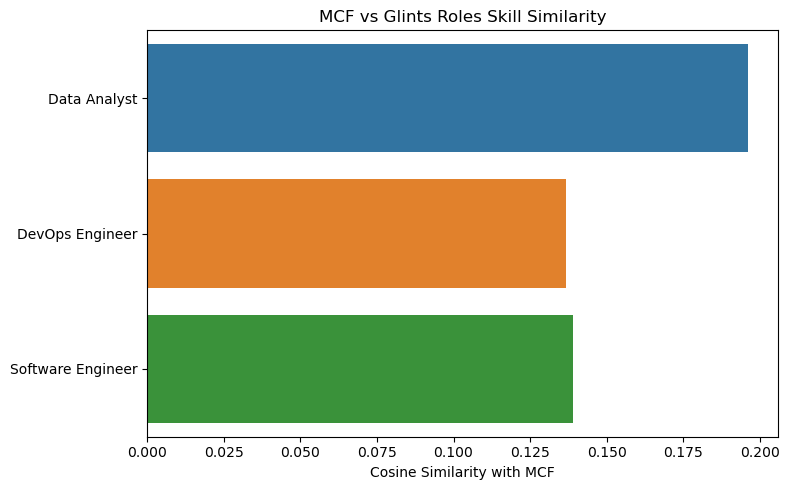

In [9]:

plt.figure(figsize=(8, 5))
sns.barplot(x=list(similarity_scores.values()), y=list(similarity_scores.keys()))
plt.xlabel("Cosine Similarity with MCF")
plt.title("MCF vs Glints Roles Skill Similarity")
plt.tight_layout()
plt.show()
